# Statistical Methods (SS18) {-}
## David Bubeck, Henrik Lukas Ruh & Manuel Bayer {-}
## Exercise 6 for August 14, 2018, 9:00 {-}

## Maximum Likelihood Estimation {-}

### 6.1 Planning an experiment: Test the quality of a die {-}

An experiment is to be conducted where the proper behavior of a die is checked. The probability of rolling a “one” is measured for checking against the expected probability for a fair die ($p=1/6$). The experiment is performed in the following way: the die is rolled $N=10$ times and the number of “ones” in these $N$ rolls $r$ is recorded. This counting is repeated $K$-times. The data that you finally have available are $r_k$ counts where $k = 1, . . . ,K$. For a fair die the $r_k$ should obviously follow a binomial distribution $$\mathrm{P}(r_k|N,p)=\binom{N}{r_k}p^{r_k}(1-p)^{N-r_k},$$

**a:** For this set-up, show that the ML estimators for the probability $\hat{p}$ and its variance $\mathrm{Var}\left[\hat{p}\right]$ are $$\hat{p}=\frac{1}{KN}\sum_{k=1}^K r_k,$$ and $$\mathrm{Var}\left[\hat{p}\right]\geq\frac{\hat{p}\left(1-\hat{p}\right)}{KN}.$$ 

$$\mathcal{L}=\prod_{k=1}^K \mathrm{P}(r_k|N,p)=\prod_{k=1}^K\binom{N}{r_k}p^{r_k}(1-p)^{N-r_k}\Rightarrow l\left(\{r_k\}|p\right)=\ln\mathcal{L}$$ $$=\sum_{k=1}^K\ln\binom{N}{r_k}+\sum_{k=1}^K r_k\ln p+\sum_{k=1}^K(N-r_k)\ln(1-p)\Rightarrow\frac{\partial l\left(\{r_k\}|p\right)}{\partial p}(\hat{p})=\sum_{k=1}^K\left(\frac{r_k}{\hat{p}}-\frac{N-r_k}{1-\hat{p}}\right)$$ $$+\sum_{k=1}^K\left(\frac{r_k(1-\hat{p})-\hat{p}(N-r_k)}{\hat{p}(1-\hat{p})}\right)=0\Leftrightarrow{\sum_{k=1}^K\left(r_k-r_k\hat{p}-\hat{p}N+\hat{p}r_k\right)=0=\sum_{k=1}^K\left(r_k-\hat{p}N\right)}\Leftrightarrow\sum_{k=1}^K\hat{p}N=\sum_{k=1}^K r_k$$ $$=\hat{p}N\sum_{k=1}^K 1=\hat{p}NK\Leftrightarrow\hat{p}=\frac{1}{KN}\sum_{k=1}^K r_k$$

$${\frac{\partial^2l\left(\{r_k\}|p\right)}{\partial p^2}(\hat{p})=-\frac{1}{\hat{p}^2}\sum_{k=1}^K r_k-\frac{1}{\left(1-\hat{p}\right)^2}\sum_{k=1}^K(N-r_k)=-\sum_{k=1}^K\frac{r_k\left(1-\hat{p}\right)^2+\hat{p}^2(N-r_k)}{\hat{p}^2\left(1-\hat{p}\right)^2}}$$
According to the Cramer-Rao inequality
$$\Rightarrow\mathrm{Var}\left[\hat{p}\right]\geq-\left(\frac{\partial^2l\left(\{r_k\}|p\right)}{\partial p^2}(\hat{p})\right)^{-1}=\frac{1}{\sum_{k=1}^K\frac{r_k\left(1-\hat{p}\right)^2+\hat{p}^2(N-r_k)}{\hat{p}^2\left(1-\hat{p}\right)^2}}=\frac{\hat{p}^2\left(1-\hat{p}\right)^2}{\sum_{k=1}^Kr_k\left(1-\hat{p}\right)^2+\hat{p}^2(N-r_k)}$$ $$=\frac{\hat{p}^2\left(1-\hat{p}\right)^2}{\sum_{k=1}^K\left(r_k-2r_k\hat{p}+r_k\hat{p}^2+\hat{p}^2N-\hat{p}^2r_k\right)}=\frac{\hat{p}^2\left(1-\hat{p}\right)^2}{\sum_{k=1}^K\left(r_k-2r_k\hat{p}+\hat{p}^2N\right)}=\frac{\hat{p}\left(1-\hat{p}\right)^2}{\sum_{k=1}^K\left(\frac{r_k}{\hat{p}}-2r_k+\hat{p}N\right)}$$ $$=\frac{\hat{p}\left(1-\hat{p}\right)^2}{\frac{1}{\hat{p}}\sum_{k=1}^Kr_k-2\sum_{k=1}^Kr_k+KN\hat{p}}=\frac{\hat{p}\left(1-\hat{p}\right)^2}{KN\frac{1}{\sum_{k=1}^Kr_k}\sum_{k=1}^Kr_k-2\sum_{k=1}^Kr_k+\sum_{k=1}^Kr_k}=\frac{\hat{p}\left(1-\hat{p}\right)^2}{KN(1-\hat{p})}=\frac{\hat{p}\left(1-\hat{p}\right)}{KN}$$

### 6.2 Fitting a straight line with known uncertainties in y  {-}
The next two exercises are taken from the paper of Hogg et al. "Fitting a straight line to data". Have perhaps a look at their section 1 for verifying your solutions.
Using the linear algebra as given in the lecture, or the formulation in the article by Hogg et al. (in Moodle), fitt a straight line $y = mx + b$ to the $x$, $y$, and $\sigma_y$ values for data points 5 through 20 in the table in the file hogg table1.txt (in Moodle). That is, ignore the first four data points, and also ignore the columns for $\sigma_y$ and Cor[x; y].
##### a: Write an R-program to calculate the best fitting parameters m, and b, their uncertainties, covariance, and $\chi^2$ of the fit!

In [1]:
# read in data
data_all <- read.table("hogg_table1.txt ", header=TRUE)
data <- data_all[5:20,]

# display some of the data
head(data)

,ID,x,y,sigy,sigx,rhoxy
5,5,203,495,21,5,-0.33
6,6,58,173,15,9,0.67
7,7,210,479,27,4,-0.02
8,8,202,504,14,4,-0.05
9,9,198,510,30,11,-0.84
10,10,158,416,16,7,-0.69


In [2]:
# compute normal equation matrix
N <- matrix(c(sum(data$sigy**-2),sum(data$x*data$sigy**-2)
              ,sum(data$x*data$sigy**-2),sum(data$x**2*data$sigy**-2)),2,2)

# RHS
v <- c(sum(data$y*data$sigy**-2),sum(data$x*data$y*data$sigy**-2))

# solve the linear equation
vars <- solve(N,v)

# compute uncertainties
library('MASS')
cov <- ginv(N)

vars_sigma <- c(cov[1,1]**0.5,cov[2,2]**0.5)

b <- c(vars[1],vars_sigma[1])
m <- c(vars[2],vars_sigma[2])

# chi square
chi_sq <- sum((data$y-b[1]-m[1]*data$x)**2*data$sigy**-2)

# print results
cat('m =',m[1],'+/-',m[2])
cat('\nb =',b[1],'+/-',b[2])
cat('\nchi^2 =',chi_sq)
cat('\n\nCOV[(b,m)^T,(b,m))] = N^-1 = ')
cov

m = 2.239921 +/- 0.1077805
b = 34.04773 +/- 18.24617
chi^2 = 18.68077

COV[(b,m)^T,(b,m))] = N^-1 = 

332.922601,-1.88954491
-1.889545,0.01161663


##### b: Make a plot showing the points, their uncertainties, and the best-fit line! Hint: error bars can be plotted by using arrows, e.g.:

arrows(x, y-sigy, x, y+sigy, length=0.05, angle=90, code=3)

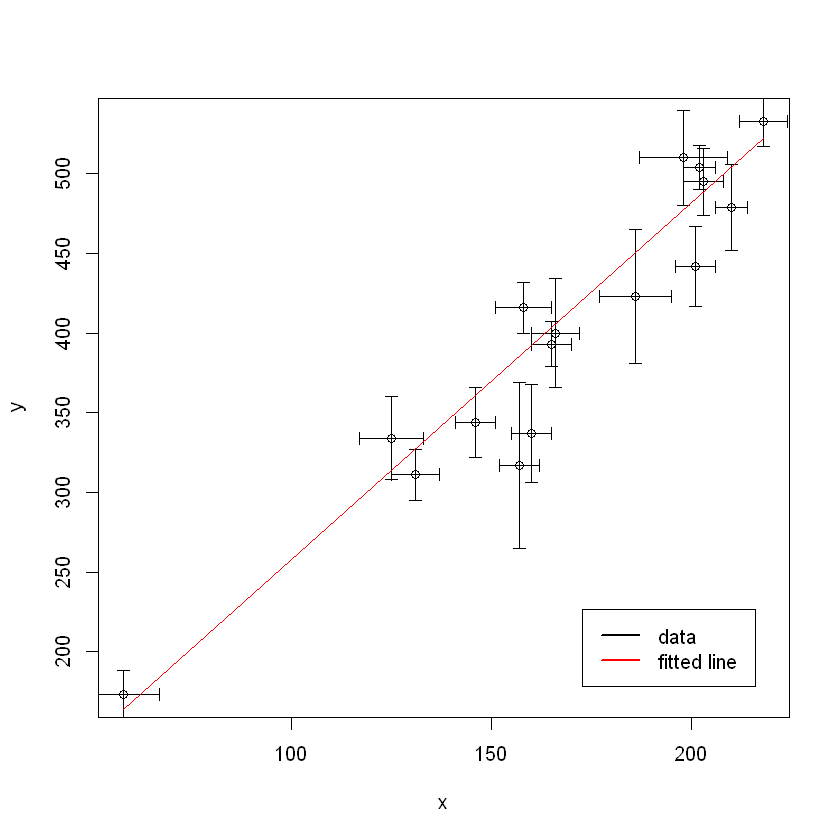

In [3]:
# plot the data
plot(data$x,data$y,xlab='x',ylab='y')
arrows(data$x, data$y-data$sigy, data$x, data$y+data$sigy, length=0.05, angle=90,
       code=3)
arrows(data$x-data$sigx, data$y, data$x+data$sigx, data$y, length=0.05, angle=90,
       code=3)

# fitted line
lines(c(min(data$x),max(data$x)),c(m[1]*min(data$x)+b[1],m[1]*max(data$x)+b[1]),
      col='red')

# legend
legend("bottomright", legend=c('data','fitted line'), inset=.05, 
       lwd=2, col=c('black','red'))

##### c: Do you have an idea how to illustrate the uncertainty of the location of the fitting line?

#### A: 

We can use error propagation to compute the errors on the fitted line at each point. Here, it is necessary to include the correlation term in the formular for the error propagation. This term is only zero in the case of independant parameters. As can be seen from the covariance matrix, the m and b are not independent.

The general formulation of the error propagation is given by
$$
\sigma_y=\sqrt{ \operatorname{grad}y \cdot \mathrm{COV}[\hat\theta,\hat\theta^T] \cdot \operatorname{grad}y^T }.
$$
For our linear function $y=mx+b$ this gives
$$
\sigma_y=\sqrt{ \left( x\sigma_m\right)^2+\sigma_b^2 + 2x\sigma_{mb}}.
$$

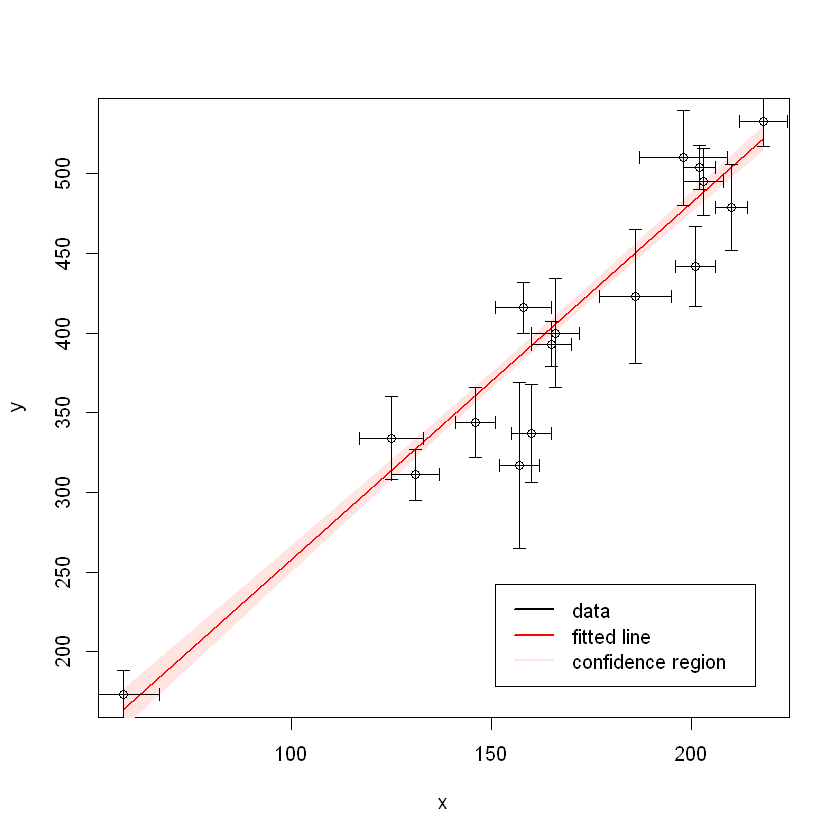

In [4]:
# plotting range
plot_val <- seq(min(data$x), max(data$x), length=100000)

# best fitting line
ymod <- m[1] * plot_val + b[1] # y-values of the best fitting line

# Uncertainty of location of best fitting line 
#(The used formula results from error propagation neglecting the error of x)
ymod_uncertainty <- sqrt((plot_val * m[2]) ** 2 + b[2] ** 2 + 2 * plot_val * cov[1,2]) 

# plot points, fit, and confidence region
plot(data$x,data$y,xlab='x',ylab='y')
# Illustration of the uncertainty of the location of the fitting line
polygon(c(plot_val, rev(plot_val)), c(ymod - ymod_uncertainty, rev(ymod +
                                                                   ymod_uncertainty)), 
        col = 'mistyrose', border = F) 
lines(plot_val, ymod, type="l",col='red')
points(data$x, data$y, xlab="x", ylab="y")
arrows(data$x, data$y-data$sigy, data$x, data$y+data$sigy, length=0.05, angle=90,
       code=3)
arrows(data$x-data$sigx, data$y, data$x+data$sigx, data$y, length=0.05, angle=90,
       code=3)

# legend
legend("bottomright", legend=c('data','fitted line','confidence region'), inset=.05, 
       lwd=2, col=c('black','red','mistyrose'))

##### d: Repeat the previous exercise but for all the data points in the table! Is there anything you do not like about the result?
##### A:
Clearly, there are lots of outlayers. Therefore, the uncertainties of the fitting parameters grow. Especially, we observe that the $\chi^2$ value is much larger than before.

In [5]:
# change data variable to complete set
data <- data_all

# compute normal equation matrix
N <- matrix(c(sum(data$sigy**-2),sum(data$x*data$sigy**-2),
              sum(data$x*data$sigy**-2),sum(data$x**2*data$sigy**-2)),2,2)

# RHS
v <- c(sum(data$y*data$sigy**-2),sum(data$x*data$y*data$sigy**-2))

# solve the linear equation
vars <- solve(N,v)

# compute uncertainties
library('MASS')
cov <- ginv(N)

vars_sigma <- c(cov[1,1]**0.5,cov[2,2]**0.5)

b <- c(vars[1],vars_sigma[1])
m <- c(vars[2],vars_sigma[2])

# chi square
chi_sq <- sum((data$y-b[1]-m[1]*data$x)**2*data$sigy**-2)

# print results
cat('m =',m[1],'+/-',m[2])
cat('\nb =',b[1],'+/-',b[2])
cat('\nchi^2 =',chi_sq)
cat('\n\nCOV[(b,m)^T,(b,m))] = N^-1 = ')
cov

m = 1.076748 +/- 0.07740678
b = 213.2735 +/- 14.39403
chi^2 = 289.9637

COV[(b,m)^T,(b,m))] = N^-1 = 

207.188189,-1.05427206
-1.054272,0.00599181


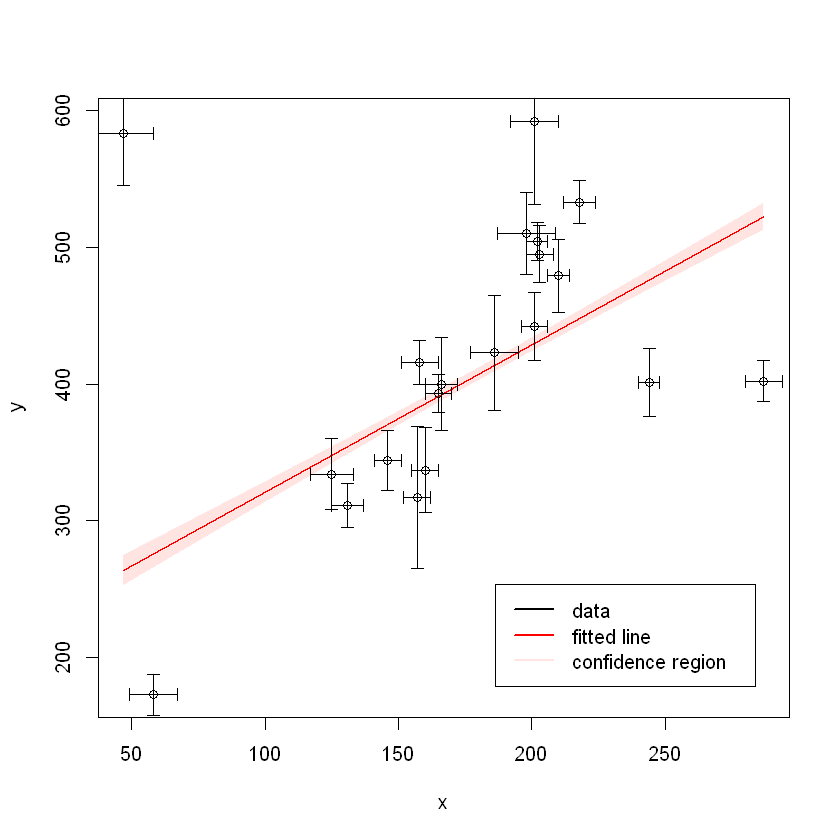

In [6]:
# plotting

# plotting range
plot_val <- seq(min(data$x), max(data$x), length=100000)

# best fitting line
ymod <- m[1] * plot_val + b[1] # y-values of the best fitting line

# Uncertainty of location of best fitting line 
#(The used formula results from error propagation neglecting the error of x)
ymod_uncertainty <- sqrt((plot_val * m[2]) ** 2 + b[2] ** 2 + 2 * plot_val * cov[1,2]) 

# plot points, fit, and confidence region
plot(data$x,data$y,xlab='x',ylab='y')
# Illustration of the uncertainty of the location of the fitting line
polygon(c(plot_val, rev(plot_val)), c(ymod - ymod_uncertainty, rev(ymod +
                                                                   ymod_uncertainty)), 
        col = 'mistyrose', border = F) 
lines(plot_val, ymod, type="l",col='red')
points(data$x, data$y, xlab="x", ylab="y")
arrows(data$x, data$y-data$sigy, data$x, data$y+data$sigy, length=0.05, angle=90,
       code=3)
arrows(data$x-data$sigx, data$y, data$x+data$sigx, data$y, length=0.05, angle=90,
       code=3)

# legend
legend("bottomright", legend=c('data','fitted line','confidence region'), inset=.05, 
       lwd=2, col=c('black','red','mistyrose'))

##### e: Of course, as statistics oriented programming language R has build in the fitting of linear models with the command lm. Compare lm results to yours. 
Hint: lm might appear a bit cryptic. Have a look at the example below for inspiration.

lm(formula = y ~ x + I(x^2), data = table_hogg, subset = (5:20),
weights=1.0/table_hogg$sigy^2)

Note that the "std. error" in the output of lm() are not the 1 $\sigma$ error bars but auxiliary quantities
useful in combination with t-statistics.

In [7]:
summary(lm(formula = y ~ x, data = data, subset 
           = (5:20), weights=1.0/data$sigy^2))


Call:
lm(formula = y ~ x, data = data, subset = (5:20), weights = 1/data$sigy^2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.7882 -0.9639 -0.4158  0.6911  1.7528 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.0477    21.0768   1.615    0.129    
x             2.2399     0.1245  17.991 4.49e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.155 on 14 degrees of freedom
Multiple R-squared:  0.9585,	Adjusted R-squared:  0.9556 
F-statistic: 323.7 on 1 and 14 DF,  p-value: 4.493e-11


The lm function gives similar results to the ones we found in our first fit.

# 6.3 Fitting a quadratic model
Generalize the method of this Section to fit a general quadratic (second order) relationship $g(x) =
qx^2 + mx + b$. Then re-do the fitting for the case without outliers. What is the best quadratic
relationship?

In [10]:
# do the same steps as before
data <- data_all[5:20,]

# compute normal equation matrix
N <- matrix(0, nrow = 3, ncol = 3)
# fill values into the normal equation matrix
# first fill the rows in the first column, than second and so on
for (i in 1:3) {
    for (j in 1:3) {
        N[j, i] <- sum(data$x**(i+j-2)*data$sigy**-2)
        }
    }

# RHS
v <- c(sum(data$y*data$sigy**-2),sum(data$x*data$y*data$sigy**-2),
       sum(data$x**2*data$y*data$sigy**-2))

# solve the linear equation
vars <- solve(N,v)

# compute uncertainties
library('MASS')
cov <- ginv(N)

vars_sigma <- c(cov[1,1]**0.5,cov[2,2]**0.5,cov[3,3]**0.5)

b <- c(vars[1],vars_sigma[1])
m <- c(vars[2],vars_sigma[2])
q <- c(vars[3],vars_sigma[3])

# chi square
chi_sq <- sum((data$y-b[1]-m[1]*data$x-q[1]*data$x**2)**2*data$sigy**-2)

# print results
cat('\nb =',b[1],'+/-',b[2])
cat('\nm =',m[1],'+/-',m[2])
cat('\nq =',q[1],'+/-',q[2])
cat('\nchi^2 =',chi_sq)
cat('\n\nCOV[(b,m,q),(b,m,q)^T)] = N^-1 = ')
cov


b = 72.89463 +/- 0.00252566
m = 1.59605 +/- 0.1781313
q = 0.002298888 +/- 0.0009535895
chi^2 = 17.40317

COV[(b,m,q),(b,m,q)^T)] = N^-1 = 

6.378961e-06,0.0004498992,-2.374346e-06
4.498992e-04,0.0317307640,-1.674592e-04
-2.374346e-06,-0.0001674592,9.093330e-07


Now we have three dependent parameters and the error of the function at each point is again given by the error propagation equation 
$$
\sigma_y=\sqrt{ \operatorname{grad}y \cdot \mathrm{COV}[\hat\theta,\hat\theta^T] \cdot \operatorname{grad}y^T },
$$
where we now get
$$
\sigma_y=\sqrt{ \left( x^2\sigma_q\right)^2+\left( x\sigma_m\right)^2+\sigma_b^2 + 2x^3\sigma_{qm} + 2x^2\sigma_{qb} + 2x\sigma_{mb}}.
$$

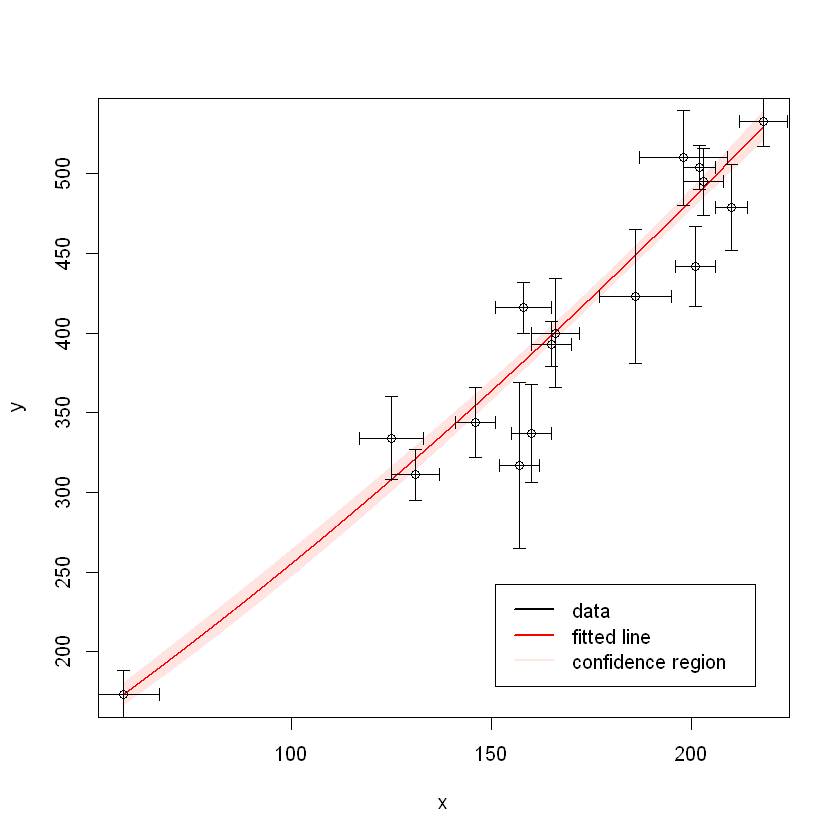

In [11]:
# plot degree 2 fit

# plotting range
plot_val <- seq(min(data$x), max(data$x), length=100000)

# fitted polynom
pol2 <- function(q,m,b,x) return(q*x**2+m*x+b)
    
# best fitting line
ymod <- pol2(q[1],m[1],b[1],plot_val) # y-values of the best fitting line

# Uncertainty of location of best fitting line 
#(The used formula results from error propagation neglecting the error of x)
ymod_uncertainty <- sqrt((plot_val**2 * q[2]) ** 2 + (plot_val * m[2]) ** 2 +
                         b[2] ** 2 + 2 * plot_val ** 3 * cov[2,3] + 2 *
                         plot_val ** 2 * cov[1,3] + 2 * plot_val * cov[1,2]) 

# plot points, fit, and confidence region
plot(data$x,data$y,xlab='x',ylab='y')
    
# Illustration of the uncertainty of the location of the fitting line
polygon(c(plot_val, rev(plot_val)), c(ymod - ymod_uncertainty, rev(ymod +
                                                                   ymod_uncertainty)), 
        col = 'mistyrose', border = F) 
lines(plot_val, ymod, type="l",col='red')
points(data$x, data$y, xlab="x", ylab="y")
arrows(data$x, data$y-data$sigy, data$x, data$y+data$sigy, length=0.05, angle=90,
       code=3)
arrows(data$x-data$sigx, data$y, data$x+data$sigx, data$y, length=0.05, angle=90,
       code=3)

# legend
legend("bottomright", legend=c('data','fitted line','confidence region'), inset=.05, 
       lwd=2, col=c('black','red','mistyrose'))